# OH full-range Benchmark 

Stress-test for RADIS LDM method on large ranges. 
Here we use OH at low temperature, typically only 730 lines with a default cutoff of  , on the full range 500 - 20,000 cm-1, typically 2 million spectral points with wstep=0.01 cm-1 .

### Conditions : 


In [1]:
from radis import get_version
print(get_version())

conditions = {
    'wavenum_min':500,             # cm-1
    'wavenum_max':10000,           # cm-1
    'molecule':'OH',
    'isotope':'1',
    'pressure':1.01325,            # bar 
    'Tgas':300,
    'mole_fraction':0.1,
    'path_length':1,
    'cutoff':1e-27,
    'verbose':3,
    }

0.9.26-0.9.23-311-g9ec20dd


### With LDM (default radis>=0.9.20)

In [2]:
from radis import calc_spectrum
s = calc_spectrum(**conditions,
                  optimization='min-RMS',
                  )
s.name = 'LDM, min-RMS ({0:.1f}s)'.format(s.conditions['calculation_time'])

Using cache file: C:\Users\erwan\.astropy\cache\astroquery\Hitran\tempfile_OH_1_495.00_10005.00.h5
parse_local_quanta not implemented for molecules of HITRAN group 6
parse_global_quanta not implemented for molecules of HITRAN class 3
The following columns had the `object` format and were removed: ['globu', 'globl', 'locu', 'locl', 'lmix']
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.00s

d:\github\radis\radis\misc\cache_files.py:415: UserWarning: Dataframe in C:\Users\erwan\.astropy\cache\astroquery\Hitran\tempfile_OH_1_495.00_10005.00.h5 contains `object` format columns: ['globu', 'globl', 'locu', 'locl', 'lmix']. Operations will be slower. Try to convert them to numeric.
  + "Operations will be slower. Try to convert them to numeric."
d:\github\radis\radis\misc\warning.py:241: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))



HAPI version: 1.1.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005
HAPI version: 1.1.2.0
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.1
   molecule             OH
   path_length          1 cm
   pressure_mbar        101

### Without LDM (default radis<0.9.20)

In [3]:
from radis import calc_spectrum
s2 = calc_spectrum(**conditions,
                   optimization=None,
                  )
s2.name = 'no LDM ({0:.1f}s)'.format(s2.conditions['calculation_time'])

Using cache file: C:\Users\erwan\.astropy\cache\astroquery\Hitran\tempfile_OH_1_495.00_10005.00.h5
parse_local_quanta not implemented for molecules of HITRAN group 6
parse_global_quanta not implemented for molecules of HITRAN class 3
The following columns had the `object` format and were removed: ['globu', 'globl', 'locu', 'locl', 'lmix']
... Fetching molecular parameters for all transitions
... Fetched molecular params in 0.00s
HAPI version: 1.1.2.0
Calculating Equilibrium Spectrum
Physical Conditions
----------------------------------------
   Tgas                 300 K
   Trot                 300 K
   Tvib                 300 K
   isotope              1
   mole_fraction        0.1
   molecule             OH
   path_length          1 cm
   pressure_mbar        1013.25 mbar
   rot_distribution     boltzmann
   self_absorption      True
   state                X
   vib_distribution     boltzmann
   wavenum_max          10000.0000 cm-1
   wavenum_min          500.0000 cm-1
Computation P

d:\github\radis\radis\misc\cache_files.py:415: UserWarning: Dataframe in C:\Users\erwan\.astropy\cache\astroquery\Hitran\tempfile_OH_1_495.00_10005.00.h5 contains `object` format columns: ['globu', 'globl', 'locu', 'locl', 'lmix']. Operations will be slower. Try to convert them to numeric.
  + "Operations will be slower. Try to convert them to numeric."
d:\github\radis\radis\misc\warning.py:241: MissingSelfBroadeningWarning: Self-broadening temperature coefficient Tdpsel not given in database: used Tdpair instead
  warnings.warn(WarningType(message))


... Initialized vectors in 0.0s
... Calculated Voigt profile (jit=True) in 0.1s
... Initialized vectors in 0.0s
... Get closest matching line & fraction in 0.0s
... Aggregate center lines in 0.0s
... Aggregate wing lines in 0.0s
Calculated line broadening in 0.15s
Calculated other spectral quantities in 0.15s
Spectrum calculated in 0.34s (before object generation)
Generated Spectrum object in 0.09s
Spectrum calculated in 0.43s


# Compare

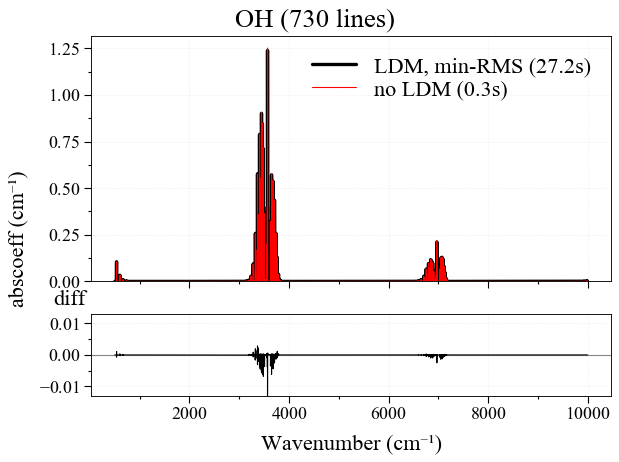

(<Figure size 640x480 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1adb6b884a8>])

In [4]:
from radis import plot_diff
plot_diff(s, s2, 'abscoeff', title='{0} ({1} lines)'.format(s.conditions['molecule'],
                                                                      s.conditions['lines_calculated']))